### Submitted By: PARVEJ ALAM ANSARI

### To clarify why you made this selection:

- The brief carefully it states that the client wanted to see “An analysis of their content categories showing the top 5 categories with the largest popularity”.
- As explained in the data model, popularity is quantified by the “Score” given to each reaction type.
- We therefore need data showing the content ID, category, content type, reaction type, and reaction score.
- So, to figure out popularity, we’ll have to add up which content categories have the largest score.

### Now we want to figure out the top 5 categories. To complete your data modelling, follow these steps:

1. Create a final data set by merging your three tables together

    We recommend using the Reaction table as your base table, then first join the relevant columns from your Content data set, and then the Reaction Types data set.
    Hint: You can use a “VLookUp” formula
     

2. Figure out the Top 5 performing categories

    Add up the total scores for each category.
    Hint: You can use the “Sum If” formula


### The end result should be one spreadsheet which contains:

    1. A cleaned dataset
    2. The top 5 categories

# 1. Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Dataset Overview

In [4]:
def information(df):
    list_item = []
    column = df.columns
    for col in column:
        list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
        desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
    return desc_df

In [5]:
reaction = pd.read_csv('Reactions.csv', index_col=0)
content = pd.read_csv('Content.csv', index_col=0)
reaction_types = pd.read_csv('ReactionTypes.csv', index_col=0)

## Content

In [9]:
content.columns

Index(['Content ID', 'User ID', 'Content Type', 'Category'], dtype='object')

In [6]:
information(content)

feature data_type  null_num  null_pct  unique_num  \
0    Content ID    object         0       0.0        1000   
1       User ID    object         0       0.0         446   
2  Content Type    object         0       0.0           4   
3      Category    object         0       0.0          29   

                                       unique_sample  
0  [97522e57-d9ab-4bd6-97bf-c24d952602d2, 9f737e0...  
1  [8d3cd87d-8a31-4935-9a4f-b319bfe05f31, beb1f34...  
2                         [photo, video, GIF, audio]  
3       [Studying, healthy eating, technology, food]

In [7]:
content.shape

(1000, 4)

In [19]:
#content['URL'] = content['URL'].fillna('missing')
#content.isna().sum()

## Reaction

In [11]:
information(reaction)

feature data_type  null_num   null_pct  unique_num  \
0  Content ID    object         0   0.000000         980   
1     User ID    object      3019  11.814660         500   
2        Type    object       980   3.835166          16   
3    Datetime    object         0   0.000000       25542   

                                       unique_sample  
0  [97522e57-d9ab-4bd6-97bf-c24d952602d2, 9f737e0...  
1  [nan, 5d454588-283d-459d-915d-c48a2cb4c27f, 92...  
2                    [nan, disgust, dislike, scared]  
3  [2021-04-22 15:17:15, 2020-11-07 09:43:50, 202...

In [12]:
reaction.shape

(25553, 4)

In [13]:
reaction = reaction.dropna()

In [14]:
reaction.isnull().sum()

Content ID    0
User ID       0
Type          0
Datetime      0
dtype: int64

In [15]:
reaction.shape

(22534, 4)

## Reaction Types

In [16]:
information(reaction_types)

feature data_type  null_num  null_pct  unique_num  \
0       Type    object         0       0.0          16   
1  Sentiment    object         0       0.0           3   
2      Score     int64         0       0.0          15   

                   unique_sample  
0   [heart, want, disgust, hate]  
1  [positive, negative, neutral]  
2                 [60, 70, 0, 5]

In [17]:
reaction_types.shape

(16, 3)

## Summary

In [18]:
content.shape, reaction.shape, reaction_types.shape

((1000, 4), (22534, 4), (16, 3))

# Join

In [20]:
df = reaction.merge(reaction_types, how='left', on='Type')
df.head()

Content ID                               User ID  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2  5d454588-283d-459d-915d-c48a2cb4c27f   
1  97522e57-d9ab-4bd6-97bf-c24d952602d2  92b87fa5-f271-43e0-af66-84fac21052e6   
2  97522e57-d9ab-4bd6-97bf-c24d952602d2  163daa38-8b77-48c9-9af6-37a6c1447ac2   
3  97522e57-d9ab-4bd6-97bf-c24d952602d2  34e8add9-0206-47fd-a501-037b994650a2   
4  97522e57-d9ab-4bd6-97bf-c24d952602d2  9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4   

         Type             Datetime Sentiment  Score  
0     disgust  2020-11-07 09:43:50  negative      0  
1     dislike  2021-06-17 12:22:51  negative     10  
2      scared  2021-04-18 05:13:58  negative     15  
3     disgust  2021-01-06 19:13:01  negative      0  
4  interested  2020-08-23 12:25:58  positive     30

In [21]:
df = df.rename(columns={'Type':'Reaction Type'})
df.head()

Content ID                               User ID  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2  5d454588-283d-459d-915d-c48a2cb4c27f   
1  97522e57-d9ab-4bd6-97bf-c24d952602d2  92b87fa5-f271-43e0-af66-84fac21052e6   
2  97522e57-d9ab-4bd6-97bf-c24d952602d2  163daa38-8b77-48c9-9af6-37a6c1447ac2   
3  97522e57-d9ab-4bd6-97bf-c24d952602d2  34e8add9-0206-47fd-a501-037b994650a2   
4  97522e57-d9ab-4bd6-97bf-c24d952602d2  9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4   

  Reaction Type             Datetime Sentiment  Score  
0       disgust  2020-11-07 09:43:50  negative      0  
1       dislike  2021-06-17 12:22:51  negative     10  
2        scared  2021-04-18 05:13:58  negative     15  
3       disgust  2021-01-06 19:13:01  negative      0  
4    interested  2020-08-23 12:25:58  positive     30

In [22]:
data = df.merge(content.drop('User ID',axis=1), on=['Content ID'], how='left')
data.head()

Content ID                               User ID  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2  5d454588-283d-459d-915d-c48a2cb4c27f   
1  97522e57-d9ab-4bd6-97bf-c24d952602d2  92b87fa5-f271-43e0-af66-84fac21052e6   
2  97522e57-d9ab-4bd6-97bf-c24d952602d2  163daa38-8b77-48c9-9af6-37a6c1447ac2   
3  97522e57-d9ab-4bd6-97bf-c24d952602d2  34e8add9-0206-47fd-a501-037b994650a2   
4  97522e57-d9ab-4bd6-97bf-c24d952602d2  9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4   

  Reaction Type             Datetime Sentiment  Score Content Type  Category  
0       disgust  2020-11-07 09:43:50  negative      0        photo  Studying  
1       dislike  2021-06-17 12:22:51  negative     10        photo  Studying  
2        scared  2021-04-18 05:13:58  negative     15        photo  Studying  
3       disgust  2021-01-06 19:13:01  negative      0        photo  Studying  
4    interested  2020-08-23 12:25:58  positive     30        photo  Studying

In [23]:
data.to_csv('accenture_task1.csv')

In [24]:
df = pd.read_csv('accenture_task1.csv', index_col=0)
df.head()

Content ID                               User ID  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2  5d454588-283d-459d-915d-c48a2cb4c27f   
1  97522e57-d9ab-4bd6-97bf-c24d952602d2  92b87fa5-f271-43e0-af66-84fac21052e6   
2  97522e57-d9ab-4bd6-97bf-c24d952602d2  163daa38-8b77-48c9-9af6-37a6c1447ac2   
3  97522e57-d9ab-4bd6-97bf-c24d952602d2  34e8add9-0206-47fd-a501-037b994650a2   
4  97522e57-d9ab-4bd6-97bf-c24d952602d2  9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4   

  Reaction Type             Datetime Sentiment  Score Content Type  Category  
0       disgust  2020-11-07 09:43:50  negative      0        photo  Studying  
1       dislike  2021-06-17 12:22:51  negative     10        photo  Studying  
2        scared  2021-04-18 05:13:58  negative     15        photo  Studying  
3       disgust  2021-01-06 19:13:01  negative      0        photo  Studying  
4    interested  2020-08-23 12:25:58  positive     30        photo  Studying

## Feature Engineering

In [25]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Hours'] = df['Datetime'].dt.hour
df['Month'] = df['Datetime'].dt.month_name()
df['Year'] = df['Datetime'].dt.year
df['Date'] = df['Datetime'].dt.day
df['Day'] = df['Datetime'].dt.day_name()

In [26]:
df['Weekend'] = np.where(df['Day']=='Saturday',1,
                np.where(df['Day']=='Sunday',1,0))

In [27]:
df['Time_Range'] = np.where((df['Hours']>=0)&(df['Hours']<4),'Midnight',
                   np.where((df['Hours']>4)&(df['Hours']<9),'Morning',
                   np.where((df['Hours']>9)&(df['Hours']<16),'Afternoon',
                   np.where((df['Hours']>17)&(df['Hours']<20),'Evening','Night'))))

In [28]:
df['AM/PM'] = np.where((df['Hours']>=0)&(df['Hours']<=12),'AM','PM')

In [29]:
df.head()

Content ID                               User ID  \
0  97522e57-d9ab-4bd6-97bf-c24d952602d2  5d454588-283d-459d-915d-c48a2cb4c27f   
1  97522e57-d9ab-4bd6-97bf-c24d952602d2  92b87fa5-f271-43e0-af66-84fac21052e6   
2  97522e57-d9ab-4bd6-97bf-c24d952602d2  163daa38-8b77-48c9-9af6-37a6c1447ac2   
3  97522e57-d9ab-4bd6-97bf-c24d952602d2  34e8add9-0206-47fd-a501-037b994650a2   
4  97522e57-d9ab-4bd6-97bf-c24d952602d2  9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4   

  Reaction Type            Datetime Sentiment  Score Content Type  Category  \
0       disgust 2020-11-07 09:43:50  negative      0        photo  Studying   
1       dislike 2021-06-17 12:22:51  negative     10        photo  Studying   
2        scared 2021-04-18 05:13:58  negative     15        photo  Studying   
3       disgust 2021-01-06 19:13:01  negative      0        photo  Studying   
4    interested 2020-08-23 12:25:58  positive     30        photo  Studying   

   Hours     Month  Year  Date        Day  Weekend Time_Range AM/PM  
0      9  November  2020     7   Saturday        1      Night    AM  
1     12      June  2021    17   Thursday        0  Afternoon    AM  
2      5     April  2021    18     Sunday        1    Morning    AM  
3     19   January  2021     6  Wednesday        0    Evening    PM  
4     12    August  2020    23     Sunday        1  Afternoon    AM

In [30]:
information(df)

feature       data_type  null_num  null_pct  unique_num  \
0      Content ID          object         0       0.0         962   
1         User ID          object         0       0.0         500   
2   Reaction Type          object         0       0.0          16   
3        Datetime  datetime64[ns]         0       0.0       22524   
4       Sentiment          object         0       0.0           3   
5           Score           int64         0       0.0          15   
6    Content Type          object         0       0.0           4   
7        Category          object         0       0.0          29   
8           Hours           int64         0       0.0          24   
9           Month          object         0       0.0          12   
10           Year           int64         0       0.0           2   
11           Date           int64         0       0.0          31   
12            Day          object         0       0.0           7   
13        Weekend           int64         0       0.0           2   
14     Time_Range          object         0       0.0           5   
15          AM/PM          object         0       0.0           2   

                                        unique_sample  
0   [97522e57-d9ab-4bd6-97bf-c24d952602d2, 9f737e0...  
1   [5d454588-283d-459d-915d-c48a2cb4c27f, 92b87fa...  
2              [disgust, dislike, scared, interested]  
3   [2020-11-07T09:43:50.000000000, 2021-06-17T12:...  
4                       [negative, positive, neutral]  
5                                     [0, 10, 15, 30]  
6                          [photo, video, GIF, audio]  
7        [Studying, healthy eating, technology, food]  
8                                      [9, 12, 5, 19]  
9                    [November, June, April, January]  
10                                       [2020, 2021]  
11                                     [7, 17, 18, 6]  
12            [Saturday, Thursday, Sunday, Wednesday]  
13                                             [1, 0]  
14               [Night, Afternoon, Morning, Evening]  
15                                           [AM, PM]

# Data Exploratory

In [31]:
pal = ['#ea698b','#d55d92','#c05299','#ac46a1','#ac46a1','#822faf','#6d23b6','#6411ad','#571089','#47126b']

## `Reaction Type by its Sentiment Score`

Text(0, 0.5, 'Sentiment Score')

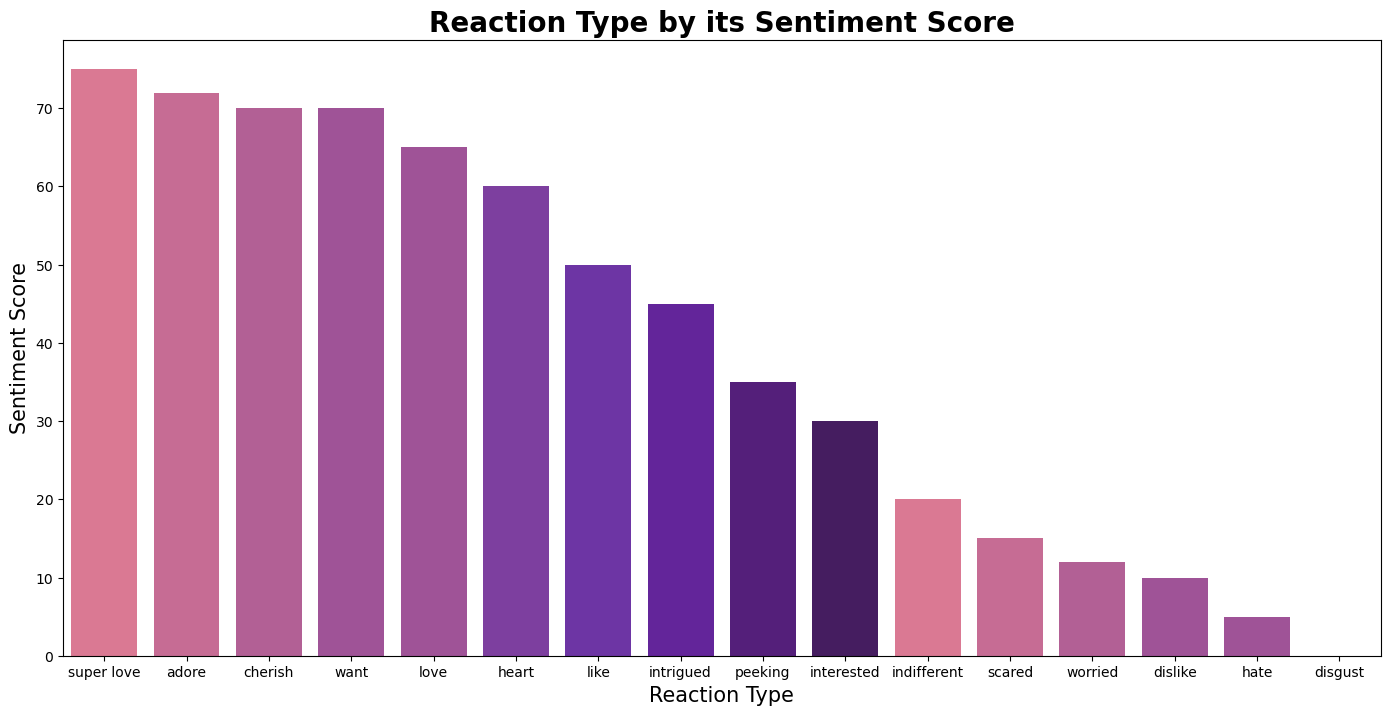

In [32]:
react_type_score = df.groupby('Reaction Type')['Score'].mean().reset_index()
plt.figure(figsize=(17,8))
sns.barplot(x='Reaction Type', y='Score', data=react_type_score, 
            palette=pal, order=react_type_score.sort_values(by='Score', ascending=False)['Reaction Type'])

plt.title('Reaction Type by its Sentiment Score', fontsize=20, weight='extra bold')
plt.xlabel('Reaction Type', fontsize=15)
plt.ylabel('Sentiment Score', fontsize=15)

## `Reaction Type by Mean Hours`

/tmp/ipykernel_28280/4041334543.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Reaction Type', y='Hours', data=df, palette=pal, ci=None,


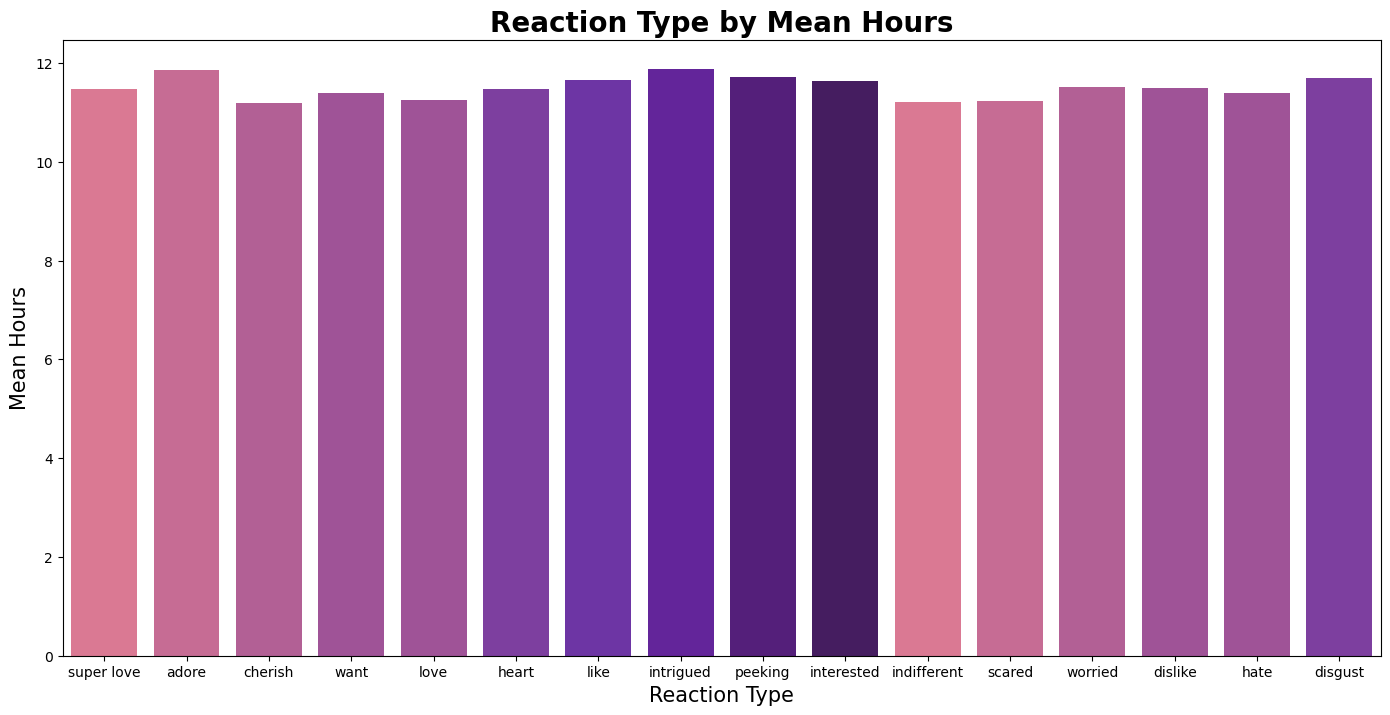

In [40]:
plt.figure(figsize=(17,8))
sns.barplot(x='Reaction Type', y='Hours', data=df, palette=pal, ci=None,
           order=react_type_score.sort_values(by='Score', ascending=False)['Reaction Type'])

plt.title('Reaction Type by Mean Hours', fontsize=20, weight='extra bold')
plt.xlabel('Reaction Type', fontsize=15)
plt.ylabel('Mean Hours', fontsize=15)
plt.show()

## `Sentiment by Time Range`

In [34]:
abc = df.groupby(['Sentiment','Time_Range'])['Hours'].count()/df.groupby('Sentiment')['Year'].count()
abc = abc.reset_index()
abc = abc.rename(columns={0:'Ratio'})
abc

Sentiment Time_Range     Ratio
0   negative  Afternoon  0.239733
1   negative    Evening  0.082137
2   negative   Midnight  0.165838
3   negative    Morning  0.175643
4   negative      Night  0.336649
5    neutral  Afternoon  0.241233
6    neutral    Evening  0.076514
7    neutral   Midnight  0.168261
8    neutral    Morning  0.168261
9    neutral      Night  0.345731
10  positive  Afternoon  0.246647
11  positive    Evening  0.084425
12  positive   Midnight  0.163248
13  positive    Morning  0.171769
14  positive      Night  0.333912

Text(0, 0.5, 'Ratio')

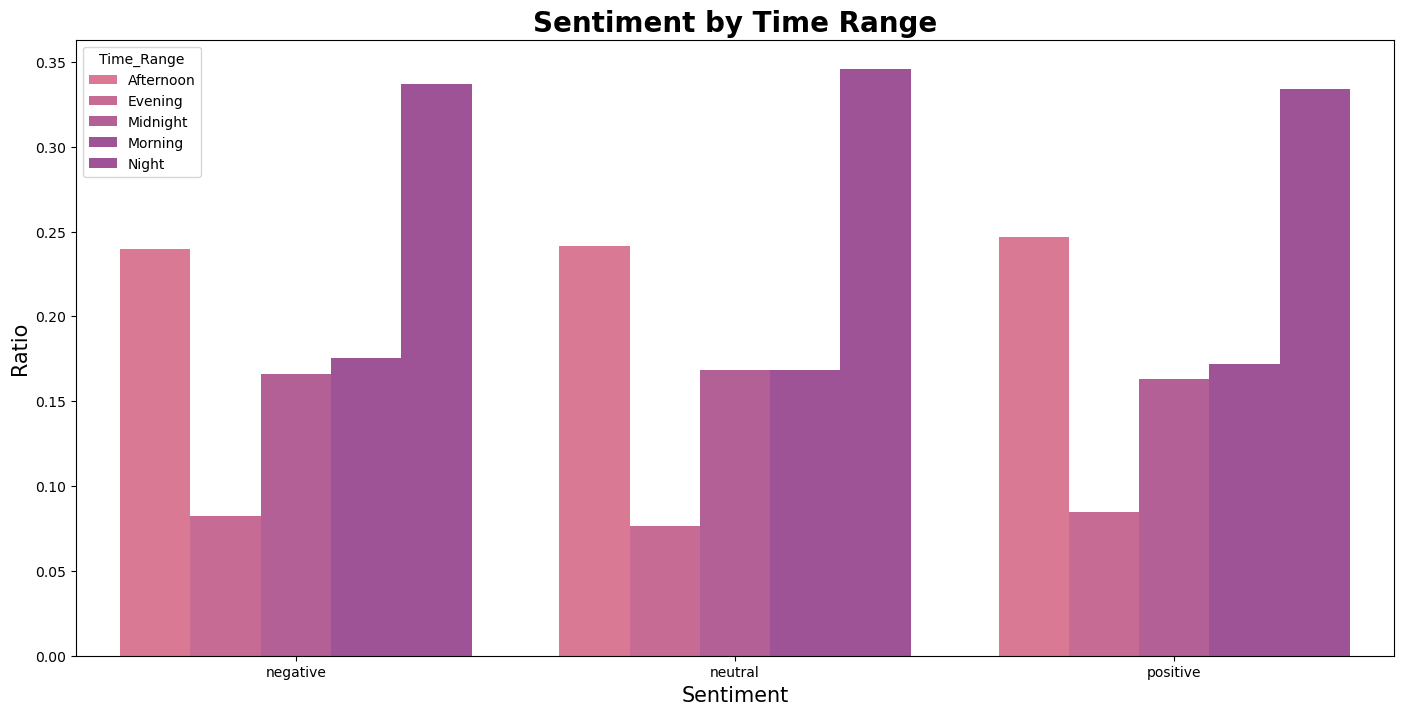

In [35]:
plt.figure(figsize=(17,8))
sns.barplot(x='Sentiment', y='Ratio', palette=pal, data=abc, hue='Time_Range')

plt.title('Sentiment by Time Range', fontsize=20, weight='extra bold')
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('Ratio', fontsize=15)

# Exploratory Data Analysis

## `Device by Duration`

In [ ]:
plt.figure(figsize=(18,7))
sns.barplot(x='Device',y='Duration',data=data, order=data.groupby('Device')['Duration'].mean().reset_index().sort_values(by='Duration',ascending=False)['Device'].values,
            palette=pal)

plt.title('Device by Duration', fontsize=20, weight='extra bold')

#plt.savefig('figure4.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

## `Category by AM/PM`

In [ ]:
order_list = ['animals', 'healthy eating', 'technology', 'science', 'cooking',]

plt.figure(figsize=(12,8))
sns.countplot(y='Category', hue='AM/PM', data=df, palette=pal,
              order=order_list)

plt.title('Top 5 Category by Title', fontsize=20, weight='extra bold')

#plt.savefig('figure5.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

## `Category by Positive Sentiment`

Text(0.5, 1.0, 'Top 5 Category Positive Sentiment')

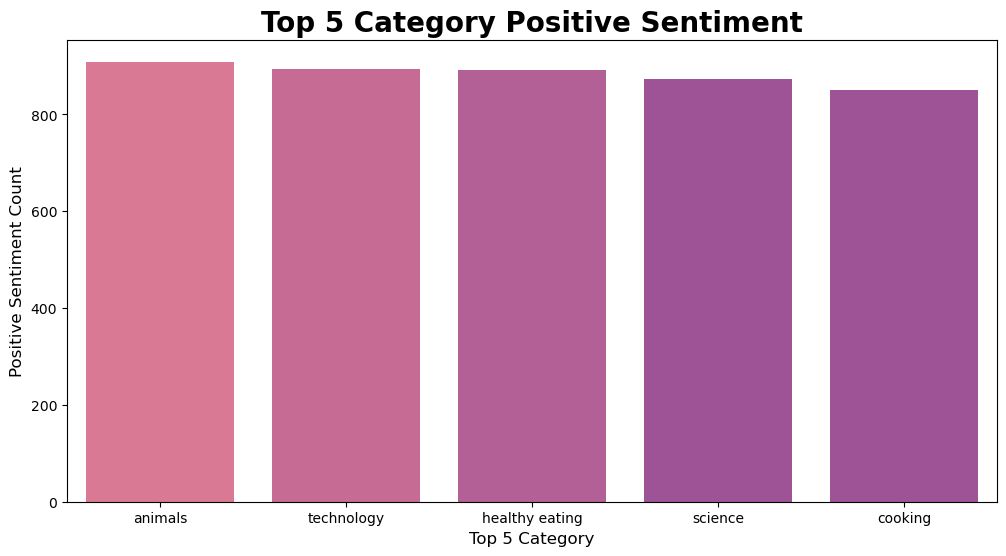

In [37]:
pos = df[df['Sentiment']=='positive']
pos = pos.groupby('Category')['Hours'].count().reset_index().sort_values(by='Hours',ascending=False).reset_index(drop=True).head(5)

plt.figure(figsize=(12,6))
sns.barplot(x='Category', y='Hours', data=pos, palette=pal)
plt.ylabel('Positive Sentiment Count', fontsize=12)
plt.xlabel('Top 5 Category', fontsize=12)
plt.title('Top 5 Category Positive Sentiment', fontsize=20, weight='extra bold')

#plt.savefig('figure6.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

## `Category by Negative Sentiment`

Text(0.5, 1.0, 'Top 5 Category Negative Sentiment')

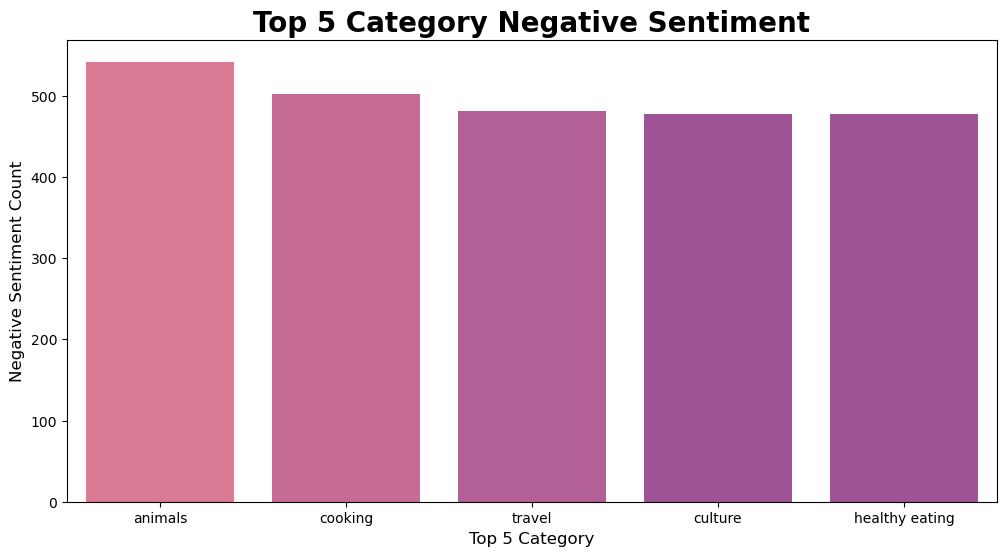

In [38]:
neg = df[df['Sentiment']=='negative']
neg = neg.groupby('Category')['Hours'].count().reset_index().sort_values(by='Hours',ascending=False).reset_index(drop=True).head(5)

plt.figure(figsize=(12,6))
sns.barplot(x='Category', y='Hours', data=neg, palette=pal)
plt.ylabel('Negative Sentiment Count', fontsize=12)
plt.xlabel('Top 5 Category', fontsize=12)
plt.title('Top 5 Category Negative Sentiment', fontsize=20, weight='extra bold')

#plt.savefig('figure7.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

In [41]:
# Calculate the total scores for each category
category_scores = df.groupby('Category')['Score'].sum().reset_index()

# Sort the categories by total score in descending order
top_categories = category_scores.sort_values(by='Score', ascending=False)

# Get the top 5 performing categories
top_5_categories = top_categories.head(5)

print(top_5_categories)

          Category  Score
13         animals  65063
20  healthy eating  62866
25      technology  62818
22         science  61081
15         culture  59213


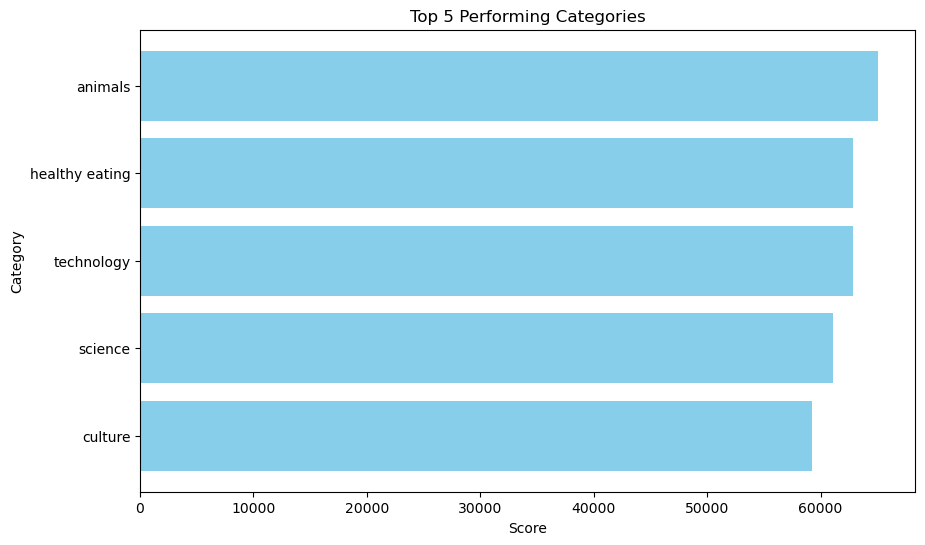

In [42]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_categories['Category'], top_5_categories['Score'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Category')
plt.title('Top 5 Performing Categories')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest score at the top
plt.show()

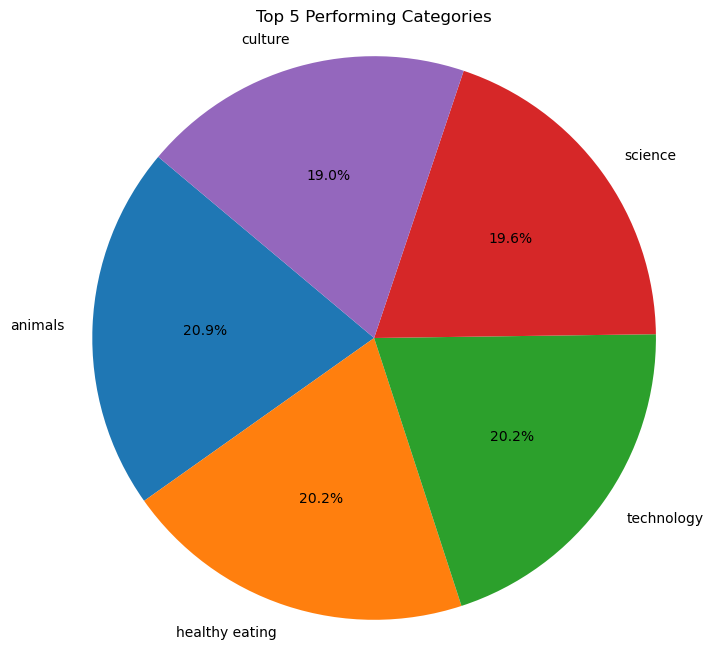

In [43]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_categories['Score'], labels=top_5_categories['Category'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.title('Top 5 Performing Categories')
plt.show()